In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import latexStrings as ls
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

Funciones Auxiliares

In [2]:
df = pd.read_csv("Data/wine.csv")


## Analisis exploratorio inicial (medias, varianzas, correlaciones)

In [3]:
data = df.copy()
data['class'] = ['type '+str(t) for t in df['type']]

In [4]:
df.groupby('type').count()

,malic_acid,ash,ash_alkalinity,magnesium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,OD280,OD315,proline
type,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59
2,71,71,71,71,71,71,71,71,71,71,71,71,71
3,48,48,48,48,48,48,48,48,48,48,48,48,48


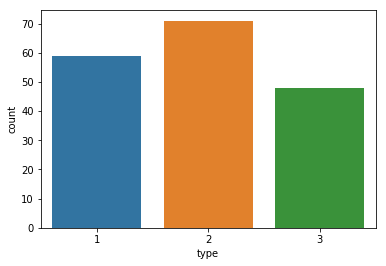

In [5]:
sns.countplot(x = 'type', data = df)

Analisis exploratorio

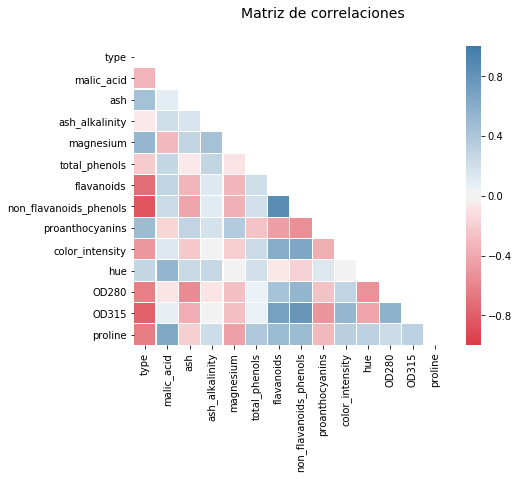

In [6]:
# Correlacion
corr = data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(7, 5.5))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, annot=False, mask=mask, vmin = -1.0, vmax = 1.0,linewidths=0.1, cmap = cmap)
fig.suptitle('Matriz de correlaciones', fontsize=14)
plt.savefig('graphs/correlaciones.png', dpi = 300)

malic_acid


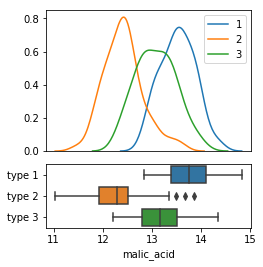

ash


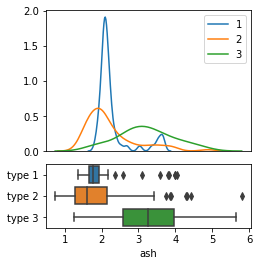

ash_alkalinity


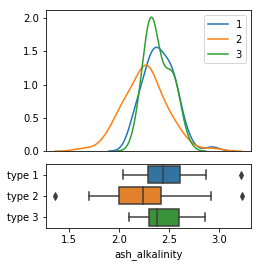

magnesium


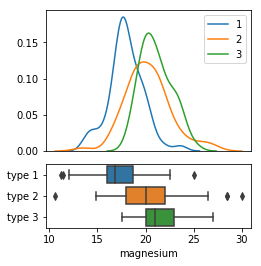

total_phenols


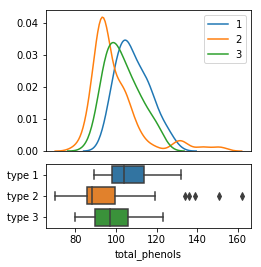

flavanoids


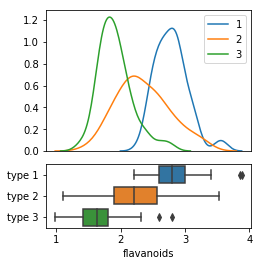

non_flavanoids_phenols


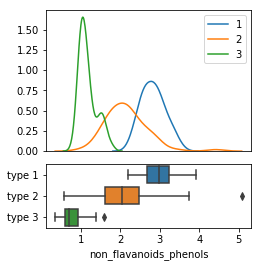

proanthocyanins


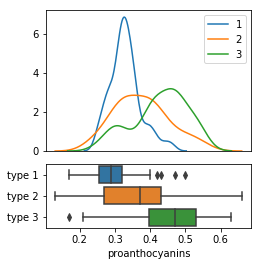

color_intensity


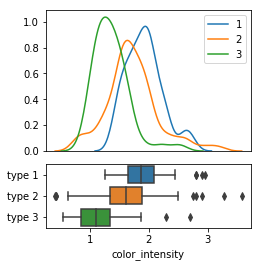

hue


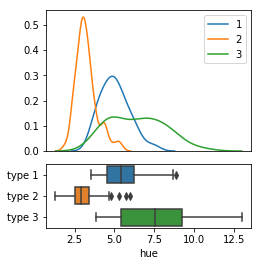

OD280


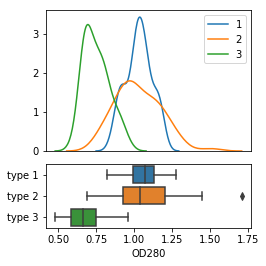

OD315


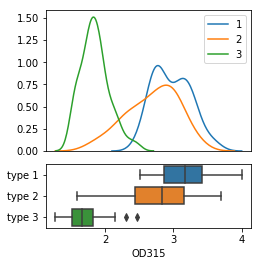

proline


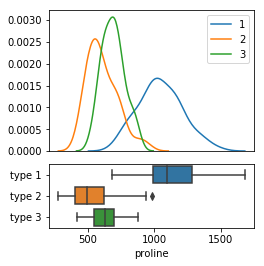

In [7]:
import matplotlib.gridspec as gridspec
for feature in data.columns[1:]:
    if feature == 'class':
        continue
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x = feature, y ='class',data = data,ax=ax2)
    sns.kdeplot(data[feature][data.type==1],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.type==2],ax=ax1,label='2')
    sns.kdeplot(data[feature][data.type==3],ax=ax1,label='3')
    
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.savefig('graphs/' + feature + '.png', dpi = 300)
    plt.show()

Estandarizamos los datos

In [8]:
for col in df.columns[1:]:
    mu = np.mean(df[col])
    sigma = np.std(df[col])
    df[col] = df[col].apply(lambda x: (x-mu)/sigma)

Tomamos una muestra de aproximadamente el 80% para hacer nuestro PCA. El resto se utilizara para probar la prediccion del modelo generado.

In [9]:
#pon tu cu si quieres, o quita la semilla
np.random.seed(158999)
mask = np.random.uniform(0, 1, len(df)) < 0.8
train = df[mask]
test = df[~mask]
print(len(train))
print(len(test))

145
33


In [59]:
train.to_csv('Data/train.csv')

In [10]:
train.groupby('type').count()

,malic_acid,ash,ash_alkalinity,magnesium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,OD280,OD315,proline
type,,,,,,,,,,,,,
1,44,44,44,44,44,44,44,44,44,44,44,44,44
2,61,61,61,61,61,61,61,61,61,61,61,61,61
3,40,40,40,40,40,40,40,40,40,40,40,40,40


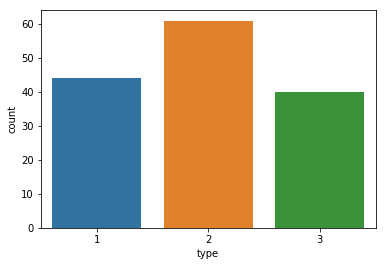

In [11]:
sns.countplot(x = "type", data = train)

In [12]:
test.groupby('type').count()

,malic_acid,ash,ash_alkalinity,magnesium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,OD280,OD315,proline
type,,,,,,,,,,,,,
1,15,15,15,15,15,15,15,15,15,15,15,15,15
2,10,10,10,10,10,10,10,10,10,10,10,10,10
3,8,8,8,8,8,8,8,8,8,8,8,8,8


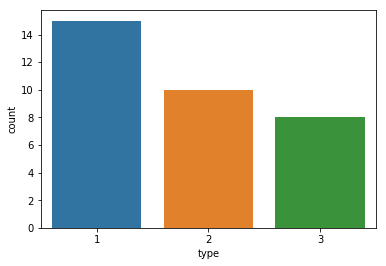

In [13]:
sns.countplot(x="type", data = test)

Hacemos un PCA hasta 90% de la varianza con los datos de entrenamiento estandarizados

In [14]:
# Analisis en componentes principales
pca = PCA(0.9)
X_train = pca.fit_transform(train.iloc[:, 1:].values)
#-1 para que sean 0, 1, 2
train_labels = train.iloc[:,0].values-1
Var_C = pca.explained_variance_ratio_
C = pca.components_
sum(Var_C)

0.9235975853288837

In [15]:
xvector = C[0]
yvector = C[1]

xs = X_train[:,0]
ys = X_train[:,1]

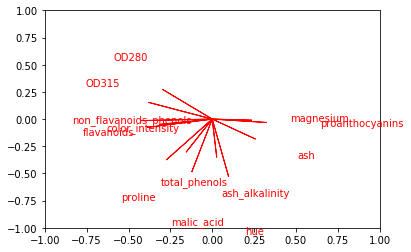

In [16]:
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i], yvector[i],
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*2, yvector[i]*2,
             list(df.columns[1:].values)[i], color='r')
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

In [60]:
Var_C

array([0.36088458, 0.19522275, 0.11385307, 0.06789414, 0.06232922,
       0.04934967, 0.04670469, 0.02735946])

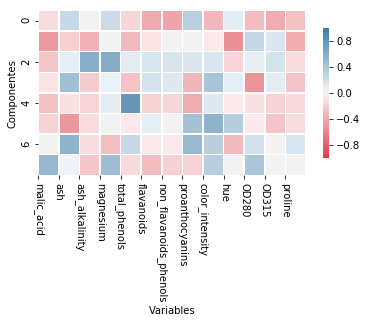

In [17]:
###### Grafica departicipacion de variables en componentes
#plt.title("Participación de compo en Componentes")
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(C, cmap=cmap, vmin=-1, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .6}, yticklabels=2,
            square=True)
plt.xticks(range(0,13),list(df.columns[1:]), rotation=-90)
plt.xlabel("Variables")
plt.ylabel("Componentes")
plt.savefig('graphs/var_en_comp.png', dpi = 300)
plt.show()

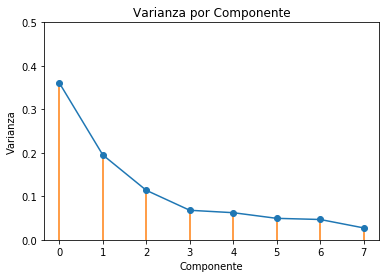

In [18]:
# Grafica de varianza acumulada
plt.title("Varianza por Componente")
plt.xlabel("Componente")
plt.ylabel("Varianza")
plt.ylim([0, 0.5])
plt.plot(range(len(Var_C)), Var_C, "-o")
plt.vlines(range(len(Var_C)), 0, Var_C, "tab:orange")
plt.savefig('graphs/var.png', dpi = 300)
plt.show()

In [19]:
var_acum = []
s = 0
for var in Var_C:
    s += var
    var_acum.append(s)

In [20]:
var_acum[1]

0.5561073296170929

In [61]:
Var_C

array([0.36088458, 0.19522275, 0.11385307, 0.06789414, 0.06232922,
       0.04934967, 0.04670469, 0.02735946])

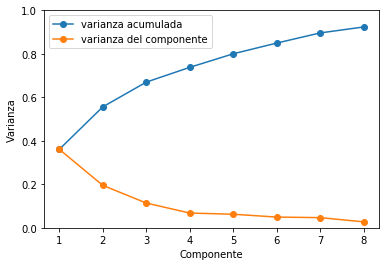

In [21]:
#plt.title("Varianza por Componente")
plt.xlabel("Componente")
plt.ylabel("Varianza")
plt.ylim([0, 1])
plt.plot(range(len(var_acum)), var_acum, "-o", label = "varianza acumulada")
plt.plot(range(len(Var_C)), Var_C, "-o", label = "varianza del componente")
plt.xticks(range(0,8),list(range(1,9)))
#plt.vlines(range(len(var_acum)), 0, var_acum, "tab:orange")
plt.legend()
plt.savefig('graphs/varianza.png', dpi = 300)
plt.show()

Grafica de Regiones a 2 componentes

In [22]:
val = {1:'1', 2:'2', 3:'3'}

df_train = pd.DataFrame()
df_train["type"] = train['type']#[val[t] for t in  train["Type"]]

for i in range(len(Var_C)):
    key = "PC" + str(i + 1)
    df_train[key] = X_train[:,i]

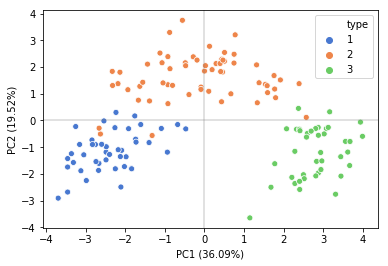

In [23]:
plt.axhline(0, color="tab:grey", alpha=0.3)
plt.axvline(0, color="tab:grey", alpha=0.3)
sns.scatterplot(x = "PC1", y = "PC2", data = df_train, hue = "type", legend = "full", palette = sns.color_palette("muted")[:3])
plt.xlabel("PC1 (36.09%)")
plt.ylabel("PC2 (19.52%)")
plt.savefig('graphs/scatter_train.png', dpi = 300)
plt.show()

Trasmformacion aplicada a datos de Test

In [24]:
X_test = pca.transform(test.iloc[:,1:].values)
test_labels = test.iloc[:,0].values-1

Grafica de regiones a 2 componentes de datos en test

In [25]:
df_test = pd.DataFrame()
df_test["type"] = test['type']#[val[t] for t in  train["Type"]]

for i in range(len(Var_C)):
    key = "PC" + str(i + 1)
    df_test[key] = X_test[:,i]

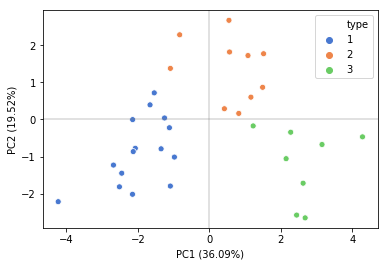

In [26]:
sns.scatterplot(x = "PC1", y = "PC2", data = df_test, hue = "type", legend = "full", palette = sns.color_palette("muted")[:3])
plt.axhline(0, color="tab:grey", alpha=0.3)
plt.axvline(0, color="tab:grey", alpha=0.3)
plt.xlabel("PC1 (36.09%)")
plt.ylabel("PC2 (19.52%)")
plt.savefig('graphs/scatter_test.png', dpi = 300)
plt.show()

## Clustering por K-Means a 3 clusters

In [27]:
# 3 grupos, centros iniciales aleatorios, tomando el mejor de 10 corridas con semilla 155766 (sklearn tiene un 
# modo que se llama k-means++ que se supone converge mas rapido)
kmeans = KMeans(3, 'random', 10, random_state=155766)
#kmeans = KMeans(3, 'random', 10).fit(X_train)

Grafica de regiones a 2 componentes con nueva claisficacion

In [28]:
kmeans.fit(X_train)
labels = kmeans.predict(X_train)
labels = [l + 1 for l in labels]

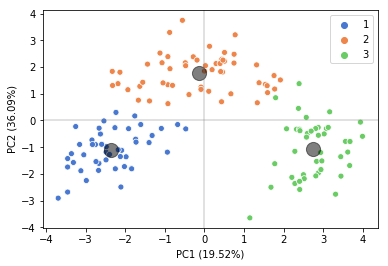

In [29]:
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=50, cmap='viridis')
sns.scatterplot(X_train[:, 0], X_train[:, 1], hue = labels, legend = "full", palette = sns.color_palette("muted")[:3])
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.axhline(0, color="tab:grey", alpha=0.3)
plt.axvline(0, color="tab:grey", alpha=0.3)
plt.xlabel("PC1 (19.52%)")
plt.ylabel("PC2 (36.09%)")
plt.savefig('graphs/kemans_train.png', dpi = 300)
plt.show()

Matriz de "matches" entre grupos (i.e. cada renglon representa una region nueva, y cada columna una region vieja. La entrada i,j significa el numero de observaciones en la nueva region i que originalmente eran de la region j)

In [30]:
M = np.zeros((3,3))

for i,j in zip(kmeans.labels_,train_labels):
    M[i, j] += 1
M

array([[44.,  3.,  0.],
       [ 0., 55.,  0.],
       [ 0.,  3., 40.]])

In [31]:
# Reordenando para que quede diagonal
print(ls.latexMatrix(M[[1,0,2], :], "",eq=False))

\begin{pmatrix} 
0 & 55 & 0 \\ 
44 & 3 & 0 \\ 
0 & 3 & 40 \\ 
\end{pmatrix}


Prediccion de Datos en Test (Diagonal = correcto)

In [32]:
test_labels = kmeans.predict(X_test)
labels_test = [l +1 for l in test_labels]

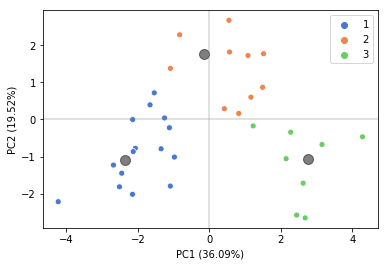

In [33]:
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y, s=50, cmap='viridis')
sns.scatterplot(X_test[:, 0], X_test[:, 1], hue = labels_test, legend = "full", palette = sns.color_palette("muted")[:3])
#centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.axhline(0, color="tab:grey", alpha=0.3)
plt.axvline(0, color="tab:grey", alpha=0.3)
plt.xlabel("PC1 (36.09%)")
plt.ylabel("PC2 (19.52%)")
plt.savefig('graphs/kemans_test.png', dpi = 300)
plt.show()

In [34]:
M = np.zeros((3,3))
for i,j in zip(test_labels,test_labels):
    M[i, j] += 1
M
print(ls.latexMatrix(M[[1,0,2], :], "",eq=False))

\begin{pmatrix} 
0 & 10 & 0 \\ 
15 & 0 & 0 \\ 
0 & 0 & 8 \\ 
\end{pmatrix}


In [35]:
M

array([[15.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0.,  8.]])

## Clustering Jerarquico utilizando la regla de minima distancia maxima

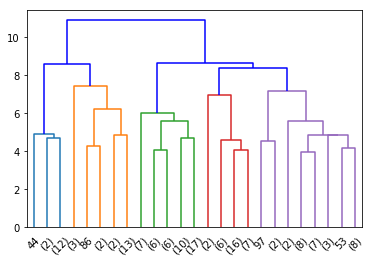

In [36]:
# Z es una estructura de como se van juntando las cosas a cada etapa del proceso
Z = sp.cluster.hierarchy.complete(X_train)
# Los numeros en parentesis son el numero de nodos chiquitos que se comio esa linea
sp.cluster.hierarchy.set_link_color_palette(["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"])
sp.cluster.hierarchy.dendrogram(Z, 25, "lastp")
plt.savefig('graphs/dendrogram_fn.png', dpi = 300)
plt.show()

In [37]:
cluster_complete = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='complete')  
cluster_complete.fit_predict(X_train)

labels_complete = [l + 1 for l in cluster_complete.labels_]

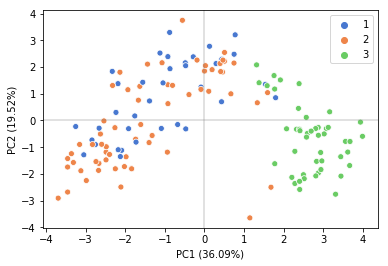

In [38]:
sns.scatterplot(X_train[:, 0], X_train[:, 1], hue = labels_complete, legend = "full", palette = sns.color_palette("muted")[:3])
plt.axhline(0, color="tab:grey", alpha=0.3)
plt.axvline(0, color="tab:grey", alpha=0.3)
plt.xlabel("PC1 (36.09%)")
plt.ylabel("PC2 (19.52%)")
plt.savefig('graphs/fn_train.png', dpi = 300)
plt.show()

In [39]:
complete_labels = sp.cluster.hierarchy.cut_tree(Z, 3).flatten()


In [40]:
M = np.zeros((3,3))

for i,j in zip(cluster_complete.labels_,train_labels):
    M[i, j] += 1
M

array([[14., 22.,  0.],
       [30., 31.,  2.],
       [ 0.,  8., 38.]])

In [41]:
print(ls.latexMatrix(M[[1,0,2], :], "",eq=False))

\begin{pmatrix} 
30 & 31 & 2 \\ 
14 & 22 & 0 \\ 
0 & 8 & 38 \\ 
\end{pmatrix}


Prediccion

In [42]:
complete_test_labels = np.array([np.argmin(
                                [max(
                                        np.linalg.norm(x-y) for y in X_train[complete_labels == i]
                                    ) for i in range(3)]
                                ) 
                                for x in X_test])
M = np.zeros((3,3))

for i,j in zip(complete_test_labels, test_labels):
    M[i, j] += 1
print(ls.latexMatrix(M[[1,0,2], :], "",eq=False))

\begin{pmatrix} 
5 & 2 & 0 \\ 
6 & 0 & 0 \\ 
4 & 8 & 8 \\ 
\end{pmatrix}


In [43]:
cmp_test = [l + 1 for l in complete_test_labels]

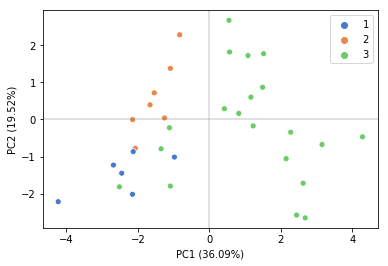

In [44]:
sns.scatterplot(X_test[:, 0], X_test[:, 1], hue = cmp_test, legend = "full", palette = sns.color_palette("muted")[:3])
plt.axhline(0, color="tab:grey", alpha=0.3)
plt.axvline(0, color="tab:grey", alpha=0.3)
plt.xlabel("PC1 (36.09%)")
plt.ylabel("PC2 (19.52%)")
plt.savefig('graphs/fn_test.png', dpi = 300)
plt.show()

Ward

In [45]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_train)

cluster_labels = [l + 1 for l in cluster.labels_]

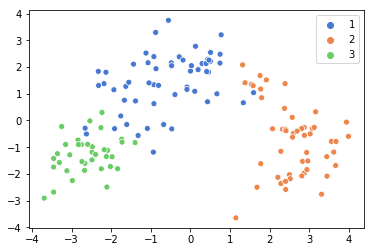

In [46]:
sns.scatterplot(X_train[:, 0], X_train[:, 1], hue = cluster_labels, legend = "full", palette = sns.color_palette("muted")[:3])

In [47]:
M = np.zeros((3,3))

for i,j in zip(cluster.labels_,train_labels):
    M[i, j] += 1
M

array([[ 7., 51.,  0.],
       [ 0., 10., 40.],
       [37.,  0.,  0.]])

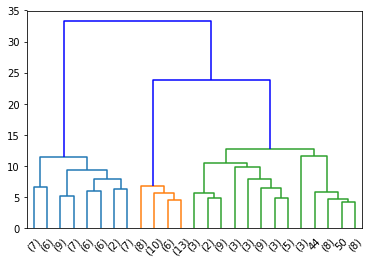

In [48]:
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(X_train, method='ward'), 25,"lastp")  

## Clustering Jerarquico utilizando la regla de Ward (min distancia cuadrada entre clusters)

https://www.stat.cmu.edu/~cshalizi/350/lectures/08/lecture-08.pdf

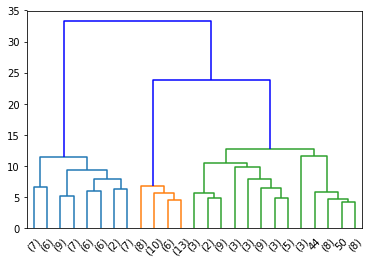

In [49]:
# Z es una estructura de como se van juntando las cosas a cada etapa del proceso
Z = sp.cluster.hierarchy.ward(X_train)
# Los numeros en parentesis son el numero de nodos chiquitos que se comio esa linea
sp.cluster.hierarchy.dendrogram(Z, 25, "lastp")
plt.savefig('graphs/dendrogram_ward.png', dpi = 300)

plt.show()

Grafica de regiones a 2 componentes con nueva claisficacion

In [50]:
ward_labels = sp.cluster.hierarchy.cut_tree(Z, 3).flatten()

In [51]:
ward_l = [l + 1 for l in ward_labels]

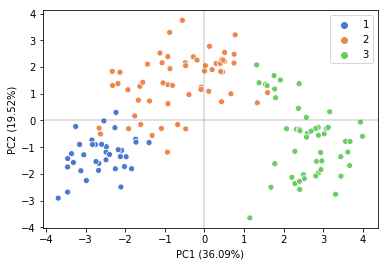

In [52]:
sns.scatterplot(X_train[:, 0], X_train[:, 1], hue = ward_l, legend = "full", palette = sns.color_palette("muted")[:3])
plt.axhline(0, color="tab:grey", alpha=0.3)
plt.axvline(0, color="tab:grey", alpha=0.3)
plt.xlabel("PC1 (36.09%)")
plt.ylabel("PC2 (19.52%)")
plt.savefig('graphs/ward_train.png', dpi = 300)
plt.show()

Matriz de "matches" entre grupos

In [53]:
M = np.zeros((3,3))

for i,j in zip(ward_labels,train_labels):
    M[i, j] += 1
M

array([[37.,  0.,  0.],
       [ 7., 51.,  0.],
       [ 0., 10., 40.]])

In [54]:
print(ls.latexMatrix(M, "",eq=False))

\begin{pmatrix} 
37 & 0 & 0 \\ 
7 & 51 & 0 \\ 
0 & 10 & 40 \\ 
\end{pmatrix}


Prediccion

In [55]:
def ward_test(X, y):
    # Hay q minimizar la varianza que se genera cuando se agrega y a algun cluster
    X_center = sum(X)/len(X)
    diff = (len(X)/(len(X) + 1)) * (np.linalg.norm(X_center - y))
    return diff

In [56]:
ward_test_labels = np.array([np.argmin([ward_test(X_train[ward_labels == i], x)
                                for i in range(3)])
                            for x in X_test])
M = np.zeros((3,3))

for i,j in zip(ward_test_labels, test_labels):
    M[i, j] += 1
print(ls.latexMatrix(M, "",eq=False))

\begin{pmatrix} 
13 & 0 & 0 \\ 
2 & 8 & 0 \\ 
0 & 2 & 8 \\ 
\end{pmatrix}


In [57]:
ward_tst = [l + 1 for l in ward_test_labels]

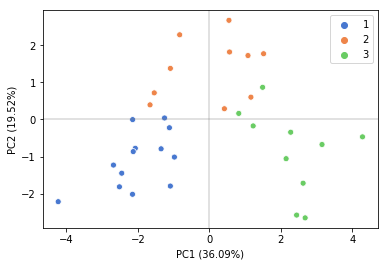

In [58]:
sns.scatterplot(X_test[:, 0], X_test[:, 1], hue = ward_tst, legend = "full", palette = sns.color_palette("muted")[:3])
plt.axhline(0, color="tab:grey", alpha=0.3)
plt.axvline(0, color="tab:grey", alpha=0.3)
plt.xlabel("PC1 (36.09%)")
plt.ylabel("PC2 (19.52%)")
plt.savefig('graphs/ward_test.png', dpi = 300)
plt.show()